In [17]:
from numpy import *
import matplotlib.pyplot as plt

In [18]:
#this is user1's data
users = 943
items = 1682
def get_data(path):
    file = open(path,'r')
    R = zeros((users,items))
    for line in file:
        movie_list = list(map(int,line.split('\t')))
        R[movie_list[0]-1,movie_list[1]-1]=movie_list[2]
    return R

In [19]:
lamda = 0.01
def split_matrix(R,Rt,K,lr,iter):
    m, n = shape(R)
    P = mat(random.random((m, K)))
    Q = mat(random.random((K, n)))
    loss_list_train=[]
    loss_list_test=[]
    for i in range(iter):
        #print (i)
        for i in range(m):
            for j in range(n):
                if R[i, j] > 0:
                    error = R[i, j]
                    for k in range(K):
                        error = error - P[i, k] * Q[k, j]
                    for k in range(K):
                        P[i, k] = P[i, k] + lr * (2 * error * Q[k, j] - lamda * P[i, k])
                        Q[k, j] = Q[k, j] + lr * (2 * error * P[i, k] - lamda * Q[k, j])
        loss = 0.0
        for i in range(m):
            for j in range(n):
                if R[i, j] > 0:
                    error = 0.0
                    for k in range(K):
                        error = error + P[i, k] * Q[k, j]
                    loss = (R[i, j] - error) * (R[i, j] - error)
                    for k in range(K):
                        loss = loss +lamda* (P[i, k] * P[i, k] + Q[k, j] * Q[k, j]) / 2
        #print ("train loss:",loss)
        loss_list_train.append(loss)
        loss = 0.0
        for i in range(m):
            for j in range(n):
                if Rt[i, j] > 0:
                    error = 0.0
                    for k in range(K):
                        error = error + P[i, k] * Q[k, j]
                    loss = (Rt[i, j] - error) * (Rt[i, j] - error)
                    for k in range(K):
                        loss = loss + lamda * (P[i, k] * P[i, k] + Q[k, j] * Q[k, j]) / 2
        if loss < 0.001:
            break
        # print step
        loss_list_test.append(loss)
        #print("test loss: ",loss)
    return P,Q,loss_list_train,loss_list_test

In [20]:
lamda = 0.01
def als(R,Rt,K,iter):
    m, n = shape(R)
    P = mat(random.random((m, K)))
    Q = mat(random.random((K, n)))
    loss_list_train = []
    loss_list_test = []
    for i in range(iter):
        #print (i)
        I = mat(eye(30))
        #optimize P
        for i in range(m):
            u = 0
            v = zeros((30,30))
            for j in range(n):
                if R[i, j] > 0:
                    #u = u + R[i, j] * Q[:, j].T
                    v = v +Q[:, j]* Q[:, j].T + 0.01*I
            #print (shape(v),shape(u))
            u = R[i,:].T * Q.T
            if linalg.det(v) != 0:
                P[i, :] = u * linalg.pinv(v)
        #optimize Q fixing P
        for j in range(n):
            u = 0
            v = zeros((30,30))
            for i in range(m):
                if R[i, j] > 0:
                    #u = u + R[i, j] * P[i, :].T
                    v = v + P[i, :].T * P[i, :] + 0.01 * I
            u =  R[:,j] * P
            if linalg.det(v) != 0:
                Q[:, j] =  (u * linalg.pinv(v)).T
        loss = 0.0
        for i in range(m):
            for j in range(n):
                if R[i, j] > 0:
                    error = 0.0
                    for k in range(K):
                        error = error + P[i, k] * Q[k, j]
                    loss = (R[i, j] - error) * (R[i, j] - error)
                    for k in range(K):
                        loss = loss + lamda * (P[i, k] * P[i, k] + Q[k, j] * Q[k, j]) / 2
        #print("train loss:", loss)
        loss_list_train.append(loss)
        loss = 0.0
        for i in range(m):
            for j in range(n):
                if Rt[i, j] > 0:
                    error = 0.0
                    for k in range(K):
                        error = error + P[i, k] * Q[k, j]
                    loss = (Rt[i, j] - error) * (Rt[i, j] - error)
                    for k in range(K):
                        loss = loss + lamda * (P[i, k] * P[i, k] + Q[k, j] * Q[k, j]) / 2
        if loss < 0.001:
            break
        # print step
        loss_list_test.append(loss)
        #print("test loss: ", loss)
    return P, Q, loss_list_train, loss_list_test

In [21]:
if __name__ == "__main__":
    path = "./ml-100k/u1.base"
    R_train=get_data(path)
    path = "./ml-100k/u1.test"
    R_test = get_data(path)
    iter = 20
    k = 30
    lr = 0.01
    P,Q,loss_list_train,loss_list_test = split_matrix(R_train,R_test,k,lr,iter)
    iter1 = range(20)
    result = P*Q

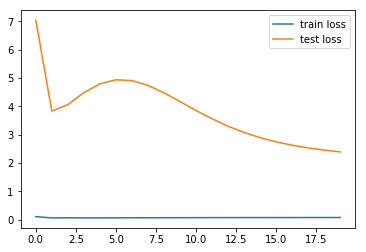

In [22]:
    plt.figure(1)
    plt.plot(iter1,loss_list_train,label='train loss')
    plt.plot(iter1,loss_list_test,label='test loss')
    plt.legend(loc='upper right')
    plt.show()

In [23]:
    P, Q, loss_list_train, loss_list_test = als(R_train, R_test, k, iter)

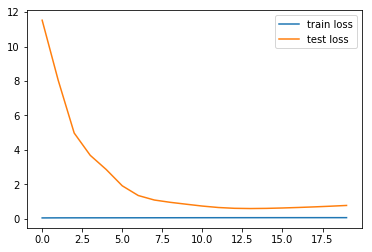

In [24]:
    plt.figure(2)
    plt.plot(iter1,loss_list_train,label='train loss')
    plt.plot(iter1,loss_list_test,label='test loss')
    plt.legend(loc='upper right')
    plt.show()